# Term0 Week3 授業前課題2 
## コーディング課題：エイムズ市の住宅価格

## 1. データセットの取得
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

上記のtrain.csvをダウンロードし、Jupyter Notebookで使っているディレクトリに置いておく。  
pd.read_csv()を使用して、変数に格納。

In [149]:
%matplotlib inline
import pandas as pd

pd.set_option("display.max_rows", 100) #  行数は100まで表示させる
pd.set_option("display.max_columns", 100) # 列数は100まで表示させる

train = pd.read_csv("train.csv")
print(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

## 2. データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明する。前回扱ったirisデータセットとの比較もすると良い。



アイオワ州、エイムズ市の住宅のあらゆる側面を示す79種類の特徴量、1460のサンプル数から、個々の住宅価格を予測するための特徴量データセットとなっている。  
ボストン住宅データセットに比べ、現代的であり、かつサンプル数・特徴量数共に充実したデータセットとして信頼できるものとなっている。  
前回扱ったirisデータセットと比べ、特徴量には離散的なカテゴリデータ（名義特徴量、順序特徴量）、欠損値など、かなり拡張されたデータセットとなっている。  
ラベルもSalePriceの数値となっており、irisデータラベルと比べて数字的に意味のあるデータとなっている。  
また、0列目には１から始まるID番号が格納されており、ID列、79種の特徴量、ラベル列の計81列となっている。

## 3. データの確認
コードとマークダウンを組み合わせて以下をレポート。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [150]:
# Xの最後の列だけラベル列になっている
# 各特徴量について
print("------データサイズ------\n", train.iloc[:, :-1].shape)
print("------各特徴量名------\n", train.iloc[:, :-1].columns)
print("------各データ型------\n", train.iloc[:, :-1].dtypes)
missing = train.iloc[:, :-1].isnull().sum()
print("------データ欠損数------\n", missing[missing>0].sort_values(ascending=False))

# 今回の目的変数
print("------今回の目的変数------")
print(train.iloc[:, -1].name)
print(train.iloc[:, -1])

# 特徴量の平均値、標準偏差、四分位数
print("------各特徴量の平均値、標準偏差、四分位数------")
print(train.iloc[:, :-1].describe())


------データサイズ------
 (1460, 80)
------各特徴量名------
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageAre

## 4. 欠損値への対応
欠損値に関して以下のことを行い、レポート。

各特徴量の欠損値の有無を確認する（欠損値の確認にはmissingnoというライブラリを活用）。
- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

------全特徴量における欠損値の割合（％）------
 6.04
------各特徴量ごとの欠損値の割合（％）------
 PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Neighborhood  

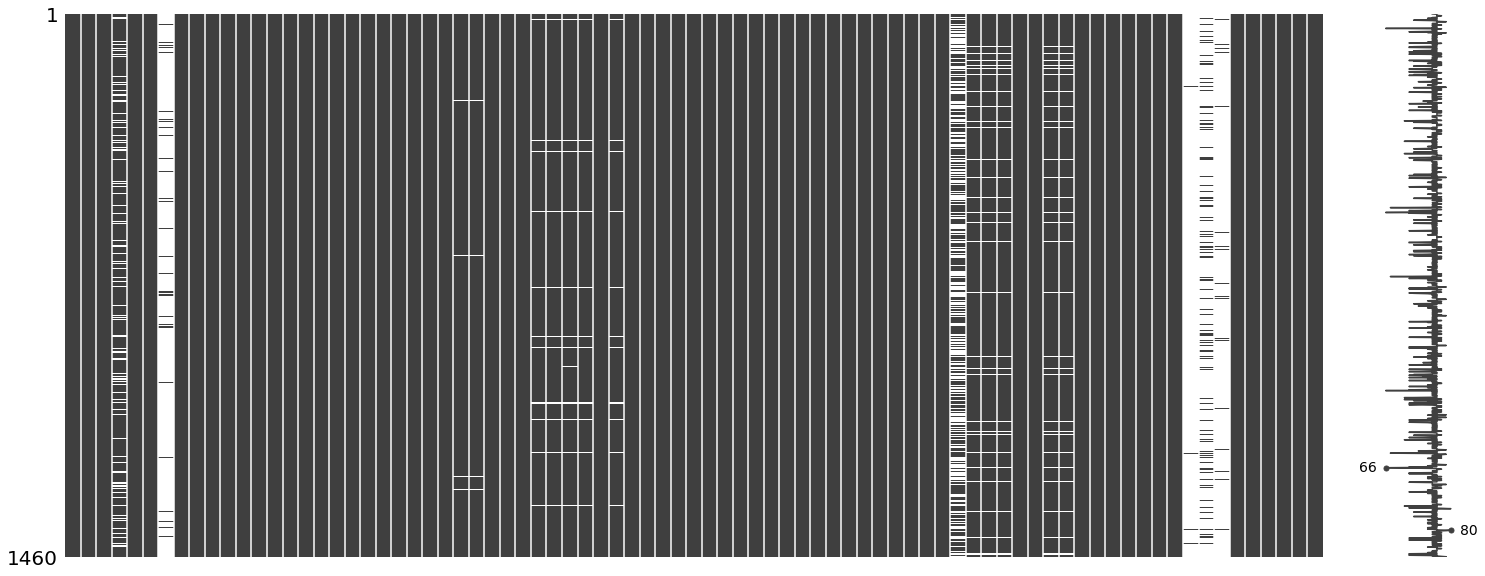

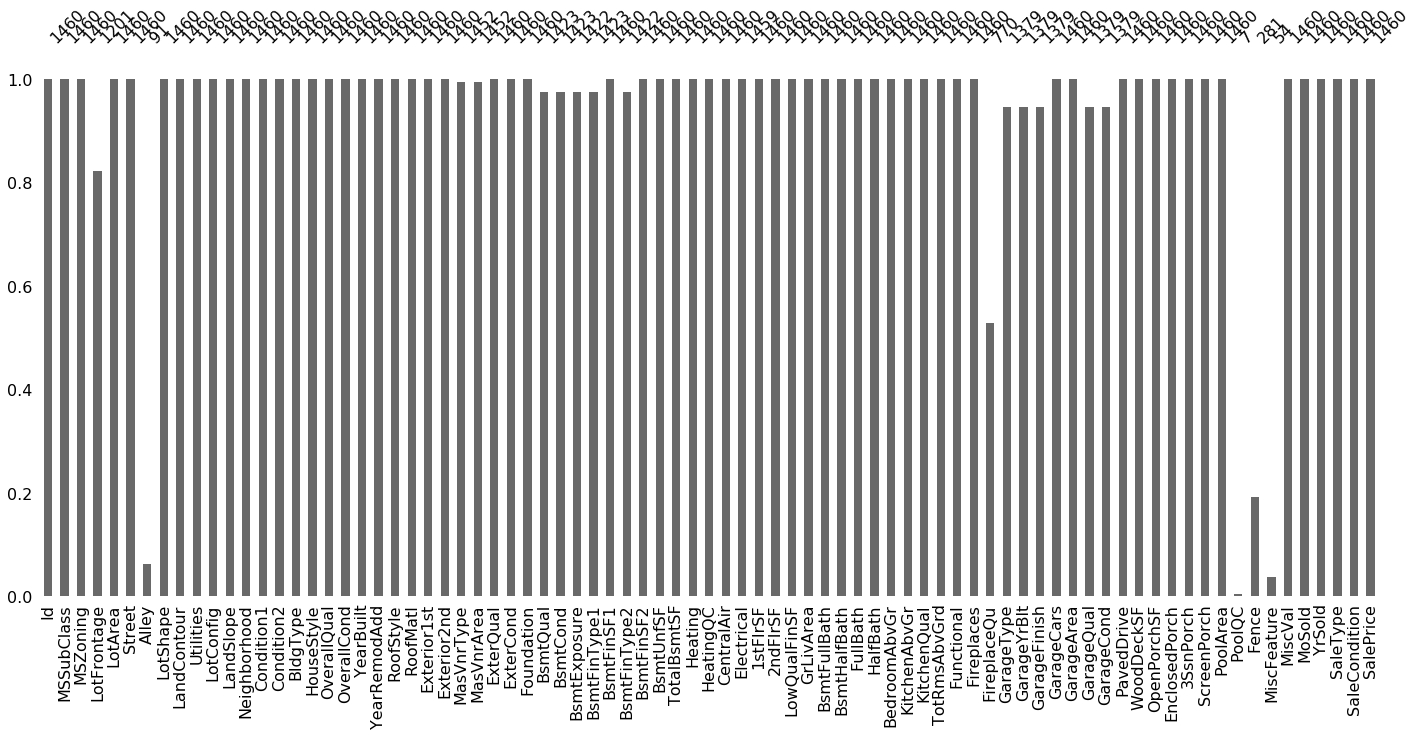

In [151]:
import missingno as msno
# 欠損値の割合
print("------全特徴量における欠損値の割合（％）------\n", 
      (100 * train.iloc[:, :-1].isnull().sum().sum()/(train.iloc[:, :-1].shape[0]*(train.iloc[:, :-1].shape[1]-1))).round(2))

print("------各特徴量ごとの欠損値の割合（％）------\n", 
      (100 * train.iloc[:, :-1].isnull().sum()/train.iloc[:, :-1].shape[0]).sort_values(ascending=False).round(2))

# missingnoで生データを可視化
print("欠損値削除前")
msno.matrix(train)
msno.bar(train)


欠損値削除後


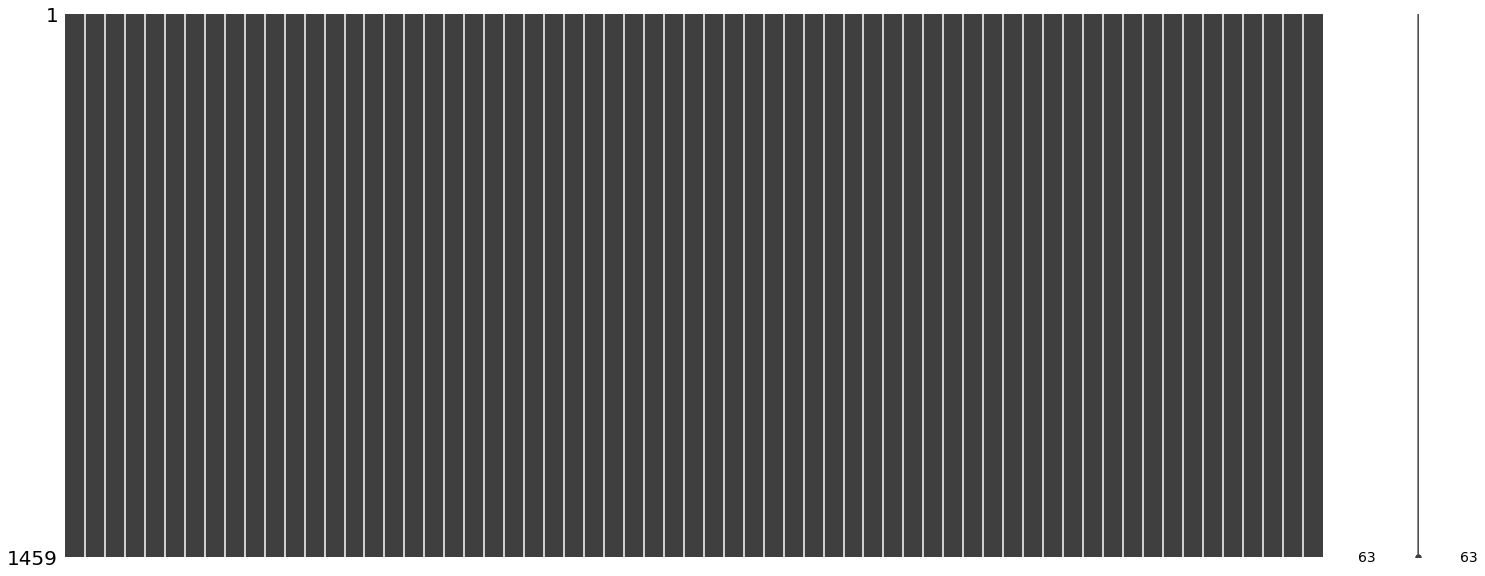

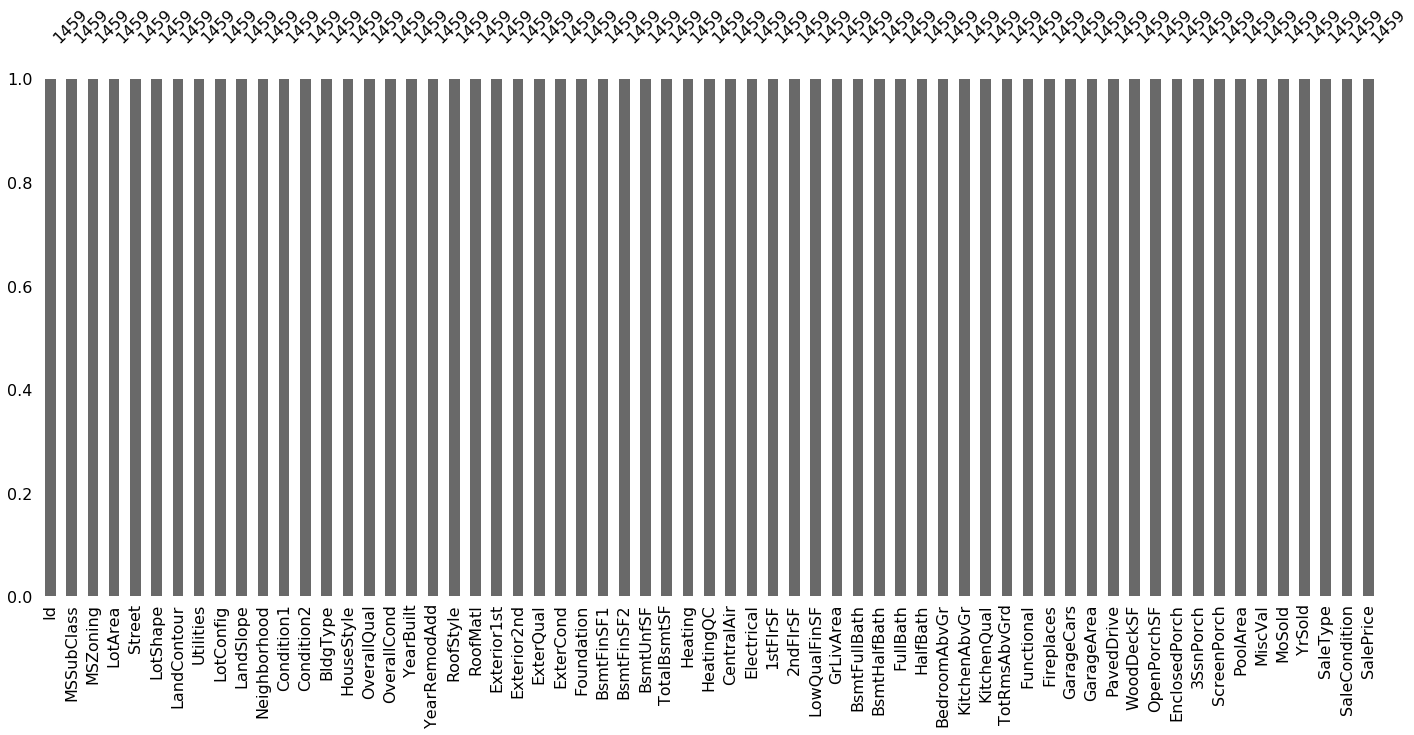

In [152]:
# 非欠損値が1455個以上の列を抽出後、欠損値がある行を削除し、可視化
train_preprocessed = train.dropna(thresh=1455, axis=1).dropna(how="any", axis=0)
print("欠損値削除後")
msno.matrix(train_preprocessed)
msno.bar(train_preprocessed)

## 5. 用語の調査
以下の２つの単語を調査してまとめる。
- 尖度
- 歪度

期待値$E(x)$、平均値$\mu$、分散$\sigma$とする。

**尖度について**  
$\alpha_4$は以下の式で定義される、分布の中心部分の尖りの程度を表す指標となる。
$$\alpha_4=E(X-\mu)^4/\sigma^4$$
通常、正規分布の$\alpha_4=3$を基準とし、$\alpha_4-3$を尖度と呼ぶ。  
$\alpha_4-3>0$なら正規分布より尖っており、$\alpha_4-3<0$なら正規分布より丸く鈍い形をしている。

**歪度について**  
歪度$\alpha_3$は以下の式で定義される。
$$\alpha_3=E(X-\mu)^3/\sigma^3$$
$\alpha_3>0$なら分布の右の裾が長く、$\alpha_3<0$なら分布の左の裾が長い。$|\alpha_3|$がその程度を表す。  
正規分布であれば$\alpha_3=0$であるが、逆は成り立たない。  
$\alpha_3=0$であっても平均値の左右における$z^3$の和が0というだけであって、必ずしも分布の左右対称性を保証する訳ではないので注意が必要である。

## 6. 分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
- 対数変換の前後での変化を「正規分布」という言葉を含めて説明する（このように加工することで予測時の精度を上げることができる）。

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


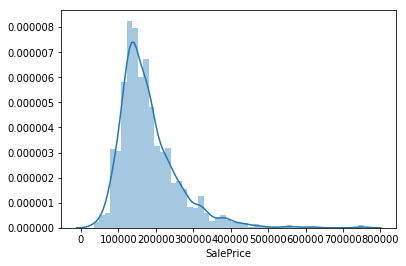

目的変数の尖度 6.529263049673958
目的変数の歪度 1.8819429948035529


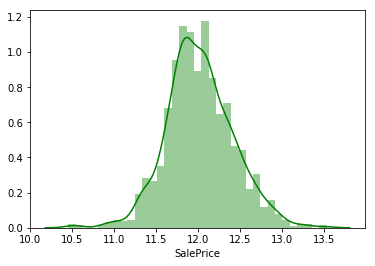

目的変数（logスケール）の尖度 0.806927847502148
目的変数（logスケール）の歪度 0.12131775882415026


In [153]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 目的変数列を抽出
y_train = train_preprocessed.SalePrice

# 目的変数の分布、尖度、歪度
sns.distplot(y_train)
plt.show()
print("目的変数の尖度", y_train.kurt())
print("目的変数の歪度", y_train.skew())

# 目的変数を対数変換
y_train_log = np.log(y_train)

# 目的変数（logスケール）の分布、尖度、歪度
sns.distplot(y_train_log, color="g")
plt.show()
print("目的変数（logスケール）の尖度", y_train_log.kurt())
print("目的変数（logスケール）の歪度", y_train_log.skew())

**対数変換の前後での変化を「正規分布」という言葉を含めて説明**  
目的変数が連続値である場合は重回帰分析を用いるが、重回帰分析では回帰残差に正規分布を仮定している。  
回帰残差を$\epsilon$、目的変数を$y$、予測値を$\hat{y}$とすると、$\epsilon=y-\hat{y}$である。  
独立した正規分布同士の和・差は正規分布である性質があるので、目的変数も正規分布（かつ残差とは無相関）である必要がある。  
今回は対数変換により正規分布に近似させ、データの尖度、歪度をマイルドにすることで予測時の精度を上げることができる。  
今回の場合、説明変数が低い方は一定限度（ゼロ）があるが、高い方には明確に限度がない。  
所得分布の対数正規分布が代表例であるように、これに類似した今回のような場合も対数変換を考えるのが自然。

## 7. 相関係数の確認
特徴量の確認をする。それぞれに対してマークダウンで説明や考察を書く。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何を表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。　　

**補足**  
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがある。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがある。

------連続値の特徴量------
 Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice_log    float64
dtype: object
------連続値の特徴量の相関係数行列------
                      Id  MSSubClass   LotArea  OverallQual  Ov

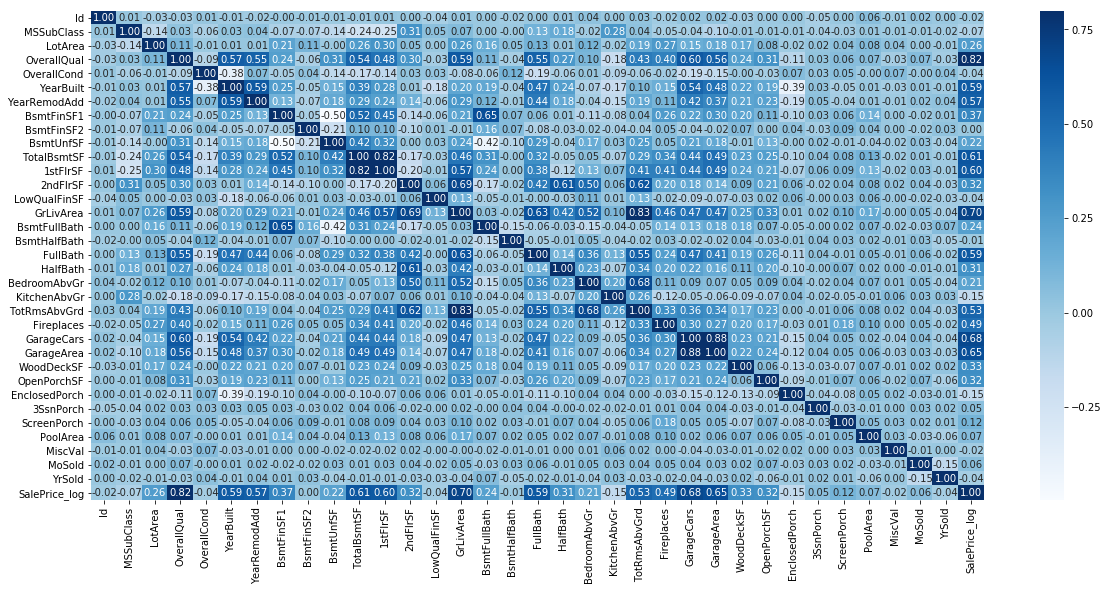

In [170]:
# 相関係数行列
numeric_features = train_preprocessed.select_dtypes(include=[np.number]) # nan削除後データから連続値のみ抽出
numeric_features.SalePrice = pd.DataFrame(y_train_log) # SalePrice列をlogスケールverに変換
numeric_features = numeric_features.rename(columns={"SalePrice":"SalePrice_log"}) # column名も"SalePrice_log"に修正
print("------連続値の特徴量------\n", numeric_features.dtypes)
corrcoef_matrix = numeric_features.corr()
print("------連続値の特徴量の相関係数行列------\n", corrcoef_matrix)

# ヒートマップ
features = numeric_features.columns
fig, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrcoef_matrix, cmap="Blues", vmax=0.8, annot_kws={'size': 10}, annot=True, fmt=".2f")
plt.show()


SalePrice_logと相関の高い特徴量がいくつか散見される。  
また、特徴量同士でも、
- GarageAreaとGarageCars
- 1stFlrSF(First Floor square feet)とTotalBsmtSF(Total square feet of basement area)
- TotRmsAbvGrd(Total rooms above grade )とGrLivArea(Above grade (ground) living area square feet)  

など、直感的にも相関の高い変数ペアが高い相関を示している。

------目的変数と各特徴量との相関係数------
 SalePrice_log    1.000000
OverallQual      0.817368
GrLivArea        0.700941
GarageCars       0.680645
GarageArea       0.650916
TotalBsmtSF      0.612642
1stFlrSF         0.597218
FullBath         0.594891
YearBuilt        0.586827
YearRemodAdd     0.565822
TotRmsAbvGrd     0.534436
Fireplaces       0.489609
BsmtFinSF1       0.372152
WoodDeckSF       0.334135
OpenPorchSF      0.321113
2ndFlrSF         0.319344
HalfBath         0.314135
LotArea          0.257321
BsmtFullBath     0.236285
BsmtUnfSF        0.222001
BedroomAbvGr     0.209044
ScreenPorch      0.121213
PoolArea         0.069798
MoSold           0.057338
3SsnPorch        0.054901
BsmtFinSF2       0.004835
BsmtHalfBath    -0.005147
Id              -0.017969
MiscVal         -0.020020
OverallCond     -0.036867
YrSold          -0.037264
LowQualFinSF    -0.037962
MSSubClass      -0.073971
KitchenAbvGr    -0.147549
EnclosedPorch   -0.149054
Name: SalePrice_log, dtype: float64
------目的変数との相関の高い特徴量10個--

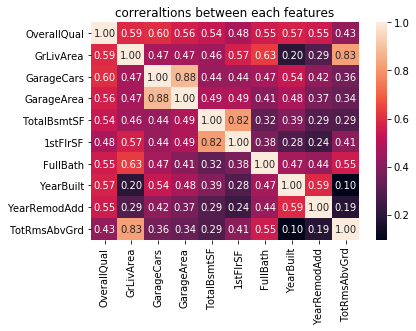

In [165]:
# 目的変数との相関の高い特徴量10個、ヒートマップ
corrcoef_SalePrice_log = corrcoef_matrix.SalePrice_log.sort_values(ascending=False)
print("------目的変数と各特徴量との相関係数------\n", corrcoef_SalePrice_log)

corrcoef_top10 = corrcoef_SalePrice_log.iloc[1:11]
print("------目的変数との相関の高い特徴量10個------\n", corrcoef_top10)

corrcoef_top10_matrix = corrcoef_matrix.loc[corrcoef_top10.index, corrcoef_top10.index]
sns.heatmap(corrcoef_top10_matrix, annot=True, fmt=".2f")
plt.title("correraltions between each features")
plt.show()

**選んだ10個の特徴量について**  
- OverallQual: Overall material and finish quality（家全体の建材の質や仕上がり具合の10段階評価）
- GrLivArea: Above grade (ground) living area square feet（地上居住空間の平米）
- GarageCars: Size of garage in car capacity（ガレージの駐車可能台数）
- GarageArea: Size of garage in square feet（ガレージの平米）
- TotalBsmtSF: Total square feet of basement area（地下空間全体の平米）
- 1stFlrSF: First Floor square feet（1階の平米）
- FullBath: Full bathrooms above grade（地上にあるトイレの数）
- YearBuilt: 建築された西暦年
- YearRemodAdd: Remodel date（改装された西暦年。改装されていなければ建築された西暦年と同じ。）
- TotRmsAbvGrd: Total rooms above grade（地上の部屋数。トイレは含めない。）

**選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ**
- GarageAreaとGarageCars（相関係数0.88）
- TotRmsAbvGrdとGrLivArea（相関係数0.83）
- 1stFlrSFとTotalBsmtSF（相関係数0.82）

$$y = w_1x_1+w_2x_2+w_3x_3$$において、例えば$$x_2{\approx}ax_3(a\neq0)$$と近似できる（相関が高い）場合、$$y=w_1x_1+(aw_2+w_3)x_3$$となる。  
この場合、$aw_2+w_3$が一定あればどんな$w_2$と$w_3$の組み合わせでもよいこととなり、一意にモデルの係数が定まらなくなる多重共線性の問題が出てくる。このため重回帰分析では、相関が高い特徴量同士の片方を削除して解析をすることが多いが、データ量やデータ種が減るので元々のデータが持つ情報が一部失われ、係数の意味合いが変わってくる可能性が出てくるので注意すべき場合がある。


## 8.（オプション）重要度の算出
ランダムフォレストという機械学習手法を用いることで、重要度の値を算出できる。この値は推定を行った時に、各特徴量がどれだけ推定値に寄与しているかを表す。ランダムフォレストは推定によく使われるが、ここでは推定自体が目的ではなく、あくまで重要度を算出するために使う。

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------平均二乗誤差（MSE）------
 0.0038082809848721875
------各特徴量の重要度------
1   OverallQual   0.5519064888826267
2   GrLivArea   0.11084406027008795
3   TotalBsmtSF   0.056963747368418485
4   GarageCars   0.03947827048741168
5   GarageArea   0.03201739111632599
6   BsmtFinSF1   0.028281354776259
7   1stFlrSF   0.02233448149791397
8   YearBuilt   0.02230132423166508
9   LotArea   0.019809637370882115
10   YearRemodAdd   0.01751447739435779
11   OverallCond   0.016744603981622416
12   BsmtUnfSF   0.011314465255981093
13   Fireplaces   0.010089894863112018
14   2ndFlrSF   0.009420424816041101
15   Id   0.00717666775322562
16   OpenPorchSF   0.006739817590763119
17   MoSold   0.00569422102162266
18   WoodDeckSF   0.004927203148659765
19   TotRmsAbvGrd   0.004311560492018674
20   MSSubClass   0.00369433468218277
21   BedroomAbvGr   0.003294426425935894
22   KitchenAbvGr   0.0029716628600756833
23   YrSold   0.0026749596116247784
24   EnclosedPorch   0.0021747624424556375
25   BsmtFullBath   0.00162

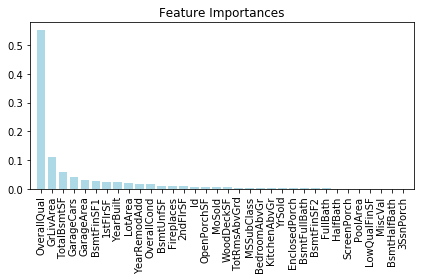

In [171]:
# ラベルが連続値なのでRegressorを使う
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

train_X = numeric_features.iloc[:, :-1]
train_y = numeric_features.SalePrice_log
rfr = RandomForestRegressor(criterion="mse", random_state=1)
rfr.fit(train_X, train_y)
prediction = rfr.predict(train_X)
print("------平均二乗誤差（MSE）------\n", 
      mean_squared_error(train_y, prediction))

# 各特徴量の重要度の可視化
# 特徴量の重要度
ftr_imp = rfr.feature_importances_

# 特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(ftr_imp)),
             'feature': ftr_imp})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.number

# 特徴量の名前
label = train_X.columns

# 特徴量の重要度順（降順）
indices = np.argsort(ftr_imp)[::-1]

# 各特徴量の重要度を出力
print("------各特徴量の重要度------")
for i in range(len(ftr_imp)):
    print(str(i + 1) + "   " + str(label[indices[i]]) +
          "   " + str(ftr_imp[indices[i]]))

plt.title('Feature Importances')
plt.bar(range(len(ftr_imp)),ftr_imp[indices], color='lightblue', align='center')
plt.xticks(range(len(ftr_imp)), label[indices], rotation=90)
plt.xlim([-1, len(ftr_imp)])
plt.tight_layout()
plt.show()
